In [1]:
##### Importando bibliotecas

import pandas as pd

df = pd.read_csv("../Data/raw/Vendas.csv", sep=";", decimal=".", encoding="utf-8")
print(df.head())
print(df.info())
print(df.describe(include="all"))

  produto   categoria  valor  quantidade cliente_id
0   Tênis    Calçados  299.9           2       C001
1  Camisa      Roupas  149.9           1       C002
2   Tênis    Calçados  299.9           1       C003
3   Calça      Roupas  199.9           2       C001
4    Boné  Acessórios   89.9           3       C004
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   produto     5 non-null      object 
 1   categoria   5 non-null      object 
 2   valor       5 non-null      float64
 3   quantidade  5 non-null      int64  
 4   cliente_id  5 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 332.0+ bytes
None
       produto categoria       valor  quantidade cliente_id
count        5         5    5.000000     5.00000          5
unique       4         3         NaN         NaN          4
top      Tênis  Calçados         NaN         NaN 

In [2]:
##### Limpando valores

import sys
sys.path.append("../scripts")

from limpeza import limpar_valores

df = limpar_valores(df)
print(df.head())

  produto   categoria   valor  quantidade cliente_id
0   Tênis    Calçados  2999.0           2       C001
1  Camisa      Roupas  1499.0           1       C002
2   Tênis    Calçados  2999.0           1       C003
3   Calça      Roupas  1999.0           2       C001
4    Boné  Acessórios   899.0           3       C004


In [3]:
##### Analisando dados

import sys
sys.path.append("../scripts")

from analise import faturamento_por_categoria, produtos_mais_vendidos, total_por_cliente

print(faturamento_por_categoria(df))
print(produtos_mais_vendidos(df).head(10))
print(total_por_cliente(df).head(10))

    categoria   valor
1    Calçados  5998.0
2      Roupas  3498.0
0  Acessórios   899.0
  produto  quantidade
0    Boné           3
3   Tênis           3
1   Calça           2
2  Camisa           1
  cliente_id   valor
0       C001  4998.0
2       C003  2999.0
1       C002  1499.0
3       C004   899.0


In [4]:
##### Salvando relatórios na pasta/reports
faturamento_por_categoria(df).to_csv("../reports/resumo_categoria.csv", index=False)
produtos_mais_vendidos(df).to_csv("../reports/produtos_mais_vendidos.csv", index=False)
total_por_cliente(df).to_csv("../reports/total_por_cliente.csv", index=False)


C:\Users\Jutty\AppData\Local\Temp\ipykernel_5108\1003295526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="categoria", y="valor", data=dados_categoria, palette="viridis")


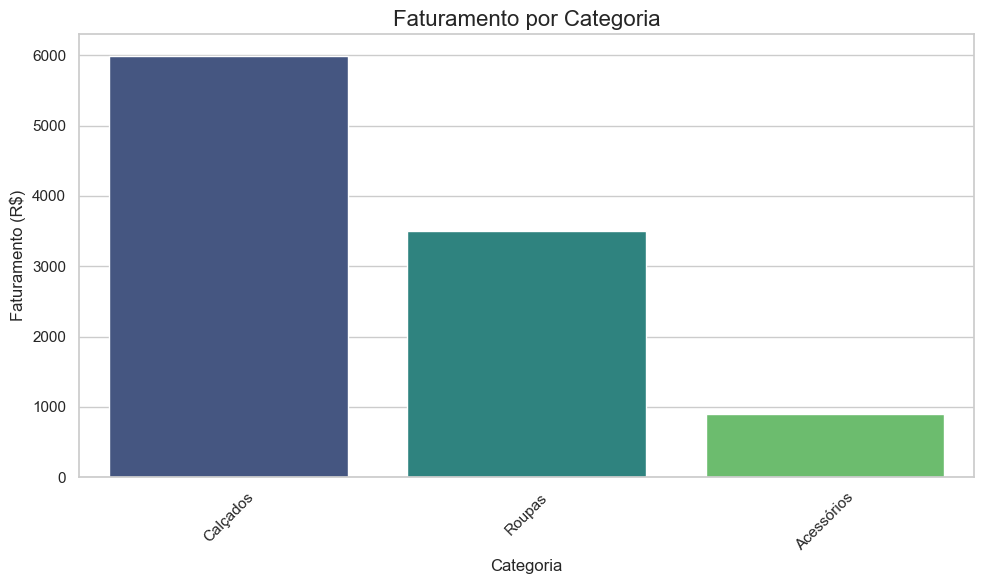

In [10]:
dados_categoria = faturamento_por_categoria(df)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="categoria", y="valor", data=dados_categoria, palette="viridis")
plt.title("Faturamento por Categoria", fontsize=16)
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
